# Dog Breed Identification
### <span style="color:red">USE PYTHON 3.7</span>
Jupyter notebook to document and display outputs for live code.
*Currently using test code from tensorflow's image classification* found:
[here](https://www.tensorflow.org/tutorials/images/classification)

Code written here imports required libraries for function

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [35]:
tf.__version__

'2.3.0'

placeholder

In [3]:
import pathlib
data_dir = os.getcwd() + "\\data\\dog_photos"
data_dir = pathlib.Path(data_dir)
print(data_dir)


c:\Users\matth\source\repos\Xyniath\Dog-Breed-Identification\data\dog_photos


In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

10222


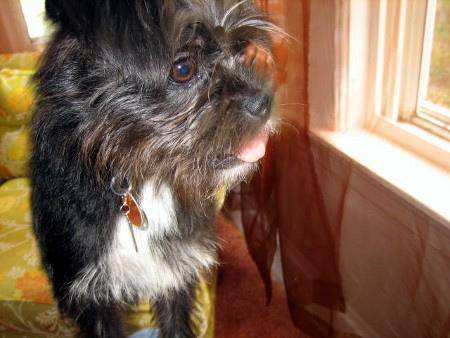

In [13]:
affenpinscher = list(data_dir.glob('affenpinscher/*'))
PIL.Image.open(str(affenpinscher[0]))

In [14]:
batch_size = 32
image_height = 180
image_width = 180

In [23]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
    validation_split=0.2,
    subset = "training",
    seed = 123,
    image_size = (image_height, image_width),
    batch_size = batch_size)

Found 10222 files belonging to 120 classes.
Using 8178 files for training.


In [25]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "validation",
  seed = 123,
  image_size = (image_height, image_width),
  batch_size = batch_size)

Found 10222 files belonging to 120 classes.
Using 2044 files for validation.


In [16]:
class_names = train_ds.class_names
print(class_names)

['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale', 'american_staffordshire_terrier', 'appenzeller', 'australian_terrier', 'basenji', 'basset', 'beagle', 'bedlington_terrier', 'bernese_mountain_dog', 'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound', 'bluetick', 'border_collie', 'border_terrier', 'borzoi', 'boston_bull', 'bouvier_des_flandres', 'boxer', 'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff', 'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua', 'chow', 'clumber', 'cocker_spaniel', 'collie', 'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo', 'doberman', 'english_foxhound', 'english_setter', 'english_springer', 'entlebucher', 'eskimo_dog', 'flat-coated_retriever', 'french_bulldog', 'german_shepherd', 'german_short-haired_pointer', 'giant_schnauzer', 'golden_retriever', 'gordon_setter', 'great_dane', 'great_pyrenees', 'greater_swiss_mountain_dog', 'groenendael', 'ibizan_hound', 'irish_setter', 'irish_terrier', 'iris

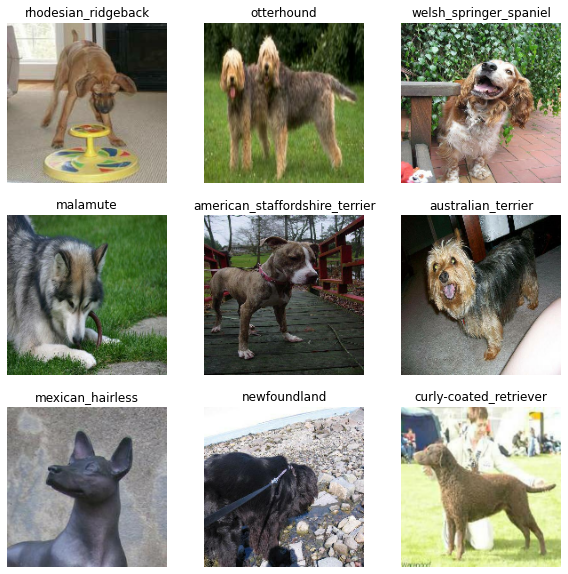

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [27]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [29]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [34]:
normalisation_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [36]:
normalised_ds = train_ds.map(lambda x, y: (normalisation_layer(x), y))
image_batch, labels_batch = next(iter(normalised_ds))
first_image = image_batch[0]
#Notice the pixels values are now in `[0,1,]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [39]:
num_classes = 120

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)       

In [43]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
124/256 [=============>................] - ETA: 1:18 - loss: 4.7938 - accuracy: 0.0101

KeyboardInterrupt: 